<a href="https://colab.research.google.com/github/ActiveStacks/ExperimentTwo/blob/main/EXPERIMENT_CODEBERTLLM_1E4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
path4 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Combined_Processed.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(path4)

In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog


In [ ]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
1729,1729,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private static final String KEY_USERNAME = ""us...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private static final String KEY_USERNAME = ""us..."
2383,2383,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","const val CHANGES_SEEN_KEY = ""nerd.tuxmobil.fa...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"const val CHANGES_SEEN_KEY = ""user_str"""
2384,2384,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","const val DISPLAY_DAY_INDEX_KEY = ""nerd.tuxmob...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"const val DISPLAY_DAY_INDEX_KEY = ""user_str"""
2385,2385,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","const val ENGELSYSTEM_SHIFTS_HASH_KEY = ""nerd....",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"const val ENGELSYSTEM_SHIFTS_HASH_KEY = ""user_..."
2386,2386,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","const val SCHEDULE_LAST_FETCHED_AT_KEY = ""nerd...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"const val SCHEDULE_LAST_FETCHED_AT_KEY = ""user..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619263,646527,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",private static final String NOTIFICATION_GROUP...,warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private static final String NOTIFICATION_GROUP...
619505,646784,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",public static final String ACKNOWLEDGEMENT_KEY...,warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String ACKNOWLEDGEMENT_KEY...
620057,647358,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private const val DARK_MODE_KEY = ""darkMode""",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private const val DARK_MODE_KEY = ""user_str"""
620058,647359,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private const val COPY_TO_CLIPBOARD_KEY = ""cop...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private const val COPY_TO_CLIPBOARD_KEY = ""use..."


In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog


In [ ]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
620505,647825,NaN,NaN,NaN,"tile[k] = Bitmap.createBitmap(tileset, j * loa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"tile[k] = Bitmap.createBitmap(tileset, j * loa..."
620506,647826,NaN,NaN,NaN,"loadedtileWidth, loadedtileHeight, matrix, fal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"loadedtileWidth, loadedtileHeight, matrix, fal..."
620507,647827,NaN,NaN,NaN,tile[k].setDensity(Bitmap.DENSITY_NONE);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tile[k].setDensity(Bitmap.DENSITY_NONE);
620508,647829,NaN,NaN,NaN,tileWidth = tile[0].getWidth();,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tileWidth = tile[0].getWidth();
620509,647830,NaN,NaN,NaN,tileHeight = tile[0].getHeight();,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tileHeight = tile[0].getHeight();


In [ ]:
df.shape

(620510, 15)

In [ ]:
df.describe()

,index,CVSS,Vulnerability_status
count,620510.000000,10916.000000,620510.000000
mean,318797.585380,6.312156,0.017592
std,188734.740482,1.647439,0.131463
min,0.000000,0.000000,0.000000
25%,155127.250000,4.300000,0.000000
50%,310254.500000,7.500000,0.000000
75%,485115.750000,7.500000,0.000000
max,647830.000000,8.800000,1.000000


In [ ]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [ ]:
df.nunique()

,0
index,620510
Description,26
Type,4
Pattern,26
Code,615780
Severity,4
Input Case,2
CVSS,10
CWE_ID,12
CWE_Desc,12


In [ ]:
df['Vulnerability_status'].unique()

array([0, 1])

In [ ]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    609594
1     10916
Name: count, dtype: int64


In [ ]:
df_safe = df[df['Vulnerability_status']==0]

In [ ]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [ ]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog


In [ ]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
620505,647825,NaN,NaN,NaN,"tile[k] = Bitmap.createBitmap(tileset, j * loa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"tile[k] = Bitmap.createBitmap(tileset, j * loa..."
620506,647826,NaN,NaN,NaN,"loadedtileWidth, loadedtileHeight, matrix, fal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"loadedtileWidth, loadedtileHeight, matrix, fal..."
620507,647827,NaN,NaN,NaN,tile[k].setDensity(Bitmap.DENSITY_NONE);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tile[k].setDensity(Bitmap.DENSITY_NONE);
620508,647829,NaN,NaN,NaN,tileWidth = tile[0].getWidth();,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tileWidth = tile[0].getWidth();
620509,647830,NaN,NaN,NaN,tileHeight = tile[0].getHeight();,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tileHeight = tile[0].getHeight();


In [ ]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
80,80,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""MainActivity"", ""Could not get data dire...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e)"
304,304,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,System.out.printf(prompt);,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.printf(prompt);
308,308,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,System.out.println(shell.runCommand(cmd));,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.println(shell.runCommand(cmd));
332,332,App can write to App Directory. Sensitive Info...,RegexOr,"['MODE_PRIVATE', 'Context\\.MODE_PRIVATE']",val sp = app.getPreferences(Context.MODE_PRIVATE),info,exact,3.9,CWE-276,Incorrect Default Permissions,NaN,MSTG-STORAGE-14,NaN,1,val sp = app.getPreferences(Context.MODE_PRIVATE)
516,516,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(TAG, ""Failed to parse color"", e);",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str"", e);"


In [ ]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
619971,647268,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(tag, ""error parsing qr code"", e)",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(tag, ""user_str"", e)"
620057,647358,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private const val DARK_MODE_KEY = ""darkMode""",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private const val DARK_MODE_KEY = ""user_str"""
620058,647359,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private const val COPY_TO_CLIPBOARD_KEY = ""cop...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private const val COPY_TO_CLIPBOARD_KEY = ""use..."
620094,647397,This App copies data to clipboard. Sensitive d...,RegexAnd,"['content\\.ClipboardManager', 'setPrimaryClip...",clipboardManager.setPrimaryClip(ClipData.newPl...,info,exact,0.0,NaN,NaN,NaN,MSTG-STORAGE-10,https://github.com/MobSF/owasp-mstg/blob/maste...,1,clipboardManager.setPrimaryClip(ClipData.newPl...
620296,647609,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","final String versionKey = ""lastversion"";",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"final String versionKey = ""user_str"";"


In [ ]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [ ]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [ ]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [ ]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [ ]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    10916
1    10916
Name: count, dtype: int64


In [ ]:
print(df_balanced.value_counts())

index   Description                                                                                 Type     Pattern                                                                                                                                                                                            Code                                                                                                     Severity  Input Case  CVSS  CWE_ID   CWE_Desc                                    OWASP_Mobile               OWSAP_MASVS      Reference                                                                                                                                  Vulnerability_status  processed_code                                                                 
647609  Files may contain hardcoded sensitive information like usernames, passwords, keys etc.      Regex    (password\s*=\s*[\'|\"].+[\'|\"]\s{0,5})|(pass\s*=\s*[\'|\"].+[\'|\"]\s{0,5})|(username\s*=\s*[\'|\"].+[\'|\"]\s{0,5

<Axes: >

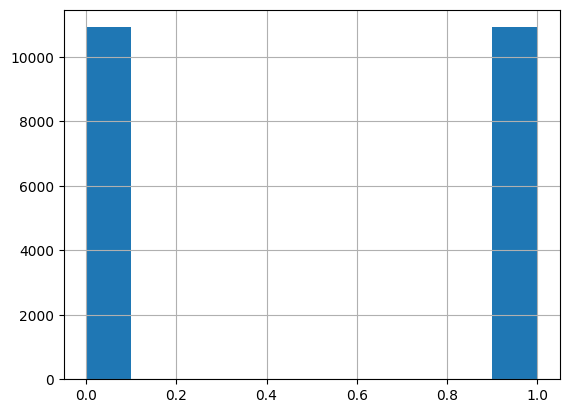

In [ ]:
df_balanced['Vulnerability_status'].hist()

In [ ]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,168612,NaN,NaN,NaN,* @return a WeatherCondition object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,* @return a WeatherCondition object
1,87103,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(""Account Checker"",""Checking made it data...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"",""user_str""+data);"
2,115922,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""PIVM"", ""Couldn't fetch package info"", th);",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", th);"
3,105891,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",public static final String ENABLE_THIRD_PARTY_...,warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String ENABLE_THIRD_PARTY_...
4,288819,NaN,NaN,NaN,"URI_MATCHER.addURI(AUTHORITY, CarColumns.TABLE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"URI_MATCHER.addURI(AUTHORITY, CarColumns.TABLE..."


In [ ]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [ ]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,168612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,* @return a WeatherCondition object
1,87103,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"",""user_str""+data);"
2,115922,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", th);"
3,105891,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String ENABLE_THIRD_PARTY_...
4,288819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"URI_MATCHER.addURI(AUTHORITY, CarColumns.TABLE..."
5,294347,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.println(response.getResult());
6,347311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,inputMethodManager.toggleSoftInputFromWindow(t...
7,136618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,AlertDialog.Builder builder = new MaterialAler...
8,182221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tr.addView(tvCol);
9,214722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,(context as MainActivity).runOnUiThread { cont...


In [ ]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
21822,259963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,boolean result = cursor.moveToFirst();
21823,235562,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"SEND_THREAD_ABORTED -> Log.w(TAG, ""user_str"")"
21824,562573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,boolean callerIsAllowed = accessProtectionHelp...
21825,603969,RegexAndOr,"['android\\.database\\.sqlite', ['rawQuery\\('...",exact,5.9,M7: Client Code Quality,NaN,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Cursor cursor = mDatabase.rawQuery(countQuery,..."
21826,165254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public List<String> getBusyBoxApplets(String p...
21827,81567,Regex,setVisibility\(View\.GONE\)|setVisibility\(Vie...,exact,4.3,M1: Improper Platform Usage,MSTG-STORAGE-7,NaN,1,passwordText.setVisibility(View.GONE);
21828,492109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,R.id.menu_underline -> annotateSelection(Annot...
21829,188884,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"if (LogSettings.DEBUG) Log.i(TAG, ""user_str"" +..."
21830,277013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"(Context context, boolean background) {"
21831,468482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,var lastUsedDate: String?


In [ ]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
3,105891,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String ENABLE_THIRD_PARTY_...
10,468451,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private const val PENDING_DOWNLOAD_BUNDLE_KEY ...
27,343952,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"const val EXT_KEY = ""user_str"""
40,5579,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return Environment.getExternalStorageState().e...
52,319262,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,Environment.getExternalStorageDirectory().getA...
...,...,...,...,...,...,...,...,...,...,...
21761,545447,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"+ ""user_str"";"
21772,508965,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"sKey = ""user_str"";"
21787,401500,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"final String queryStringKey = ""user_str"";"
21790,130909,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"val contextKey = ""user_str"""


In [ ]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [ ]:
df_balanced.head()

,processed_code,Vulnerability_status
0,* @return a WeatherCondition object,0
1,"Log.d(""user_str"",""user_str""+data);",1
2,"Log.e(""user_str"", ""user_str"", th);",1
3,public static final String ENABLE_THIRD_PARTY_...,1
4,"URI_MATCHER.addURI(AUTHORITY, CarColumns.TABLE...",0


In [ ]:
df_balanced.columns = ['text', 'labels']

In [ ]:
df_balanced.head(5)

,text,labels
0,* @return a WeatherCondition object,0
1,"Log.d(""user_str"",""user_str""+data);",1
2,"Log.e(""user_str"", ""user_str"", th);",1
3,public static final String ENABLE_THIRD_PARTY_...,1
4,"URI_MATCHER.addURI(AUTHORITY, CarColumns.TABLE...",0


In [ ]:
df_balanced.head(5)

,text,labels
0,* @return a WeatherCondition object,0
1,"Log.d(""user_str"",""user_str""+data);",1
2,"Log.e(""user_str"", ""user_str"", th);",1
3,public static final String ENABLE_THIRD_PARTY_...,1
4,"URI_MATCHER.addURI(AUTHORITY, CarColumns.TABLE...",0


In [ ]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

In [ ]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 21832
    })
})

In [ ]:
from posixpath import split
split_dataset = codes_dataset['train'].train_test_split(test_size=0.2)

In [ ]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 17465
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 4367
    })
})

In [ ]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [ ]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [ ]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/17465 [00:00<?, ? examples/s]

Map:   0%|          | 0/4367 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [ ]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc=np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'binary')
  return {'accuracy' : acc, 'f1':f1}

In [ ]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['test'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-56-e5df01f81142>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.103700,0.088951,0.980994,0.981037
2,0.066900,0.078234,0.983284,0.983383
3,0.051600,0.079063,0.984200,0.984300


TrainOutput(global_step=3276, training_loss=0.08100264995234935, metrics={'train_runtime': 1155.4674, 'train_samples_per_second': 45.345, 'train_steps_per_second': 2.835, 'total_flos': 1.37857037455872e+16, 'train_loss': 0.08100264995234935, 'epoch': 3.0})